Импортирование библиотек и загрузка датасета.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist        
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Предварительная обработка данных.

In [2]:
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)
x_train.shape

(60000, 28, 28)

Построение модели.

In [3]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


C:\Users\Алексей\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.compile(optimizer='adam', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Обучение модели.

In [5]:
start_time = time.time()
history = model.fit(x_train, y_train_cat, batch_size=32, epochs=4, validation_split=0.2)
res = time.time()-start_time
res

Epoch 1/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8594 - loss: 0.4908 - val_accuracy: 0.9537 - val_loss: 0.1617
Epoch 2/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9614 - loss: 0.1324 - val_accuracy: 0.9669 - val_loss: 0.1139
Epoch 3/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9741 - loss: 0.0873 - val_accuracy: 0.9714 - val_loss: 0.1000
Epoch 4/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9805 - loss: 0.0639 - val_accuracy: 0.9707 - val_loss: 0.0973


33.26432013511658

Оцениваем точность.

In [6]:
model.evaluate(x_test, y_test_cat, verbose=2)


313/313 - 1s - 3ms/step - accuracy: 0.9717 - loss: 0.0953


[0.09531360864639282, 0.9717000126838684]

 Предсказываем результат на новых данных.

In [7]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Построение графиков.


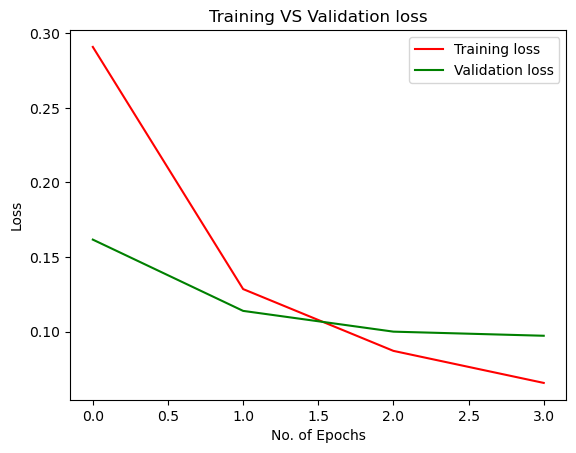

In [8]:
plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

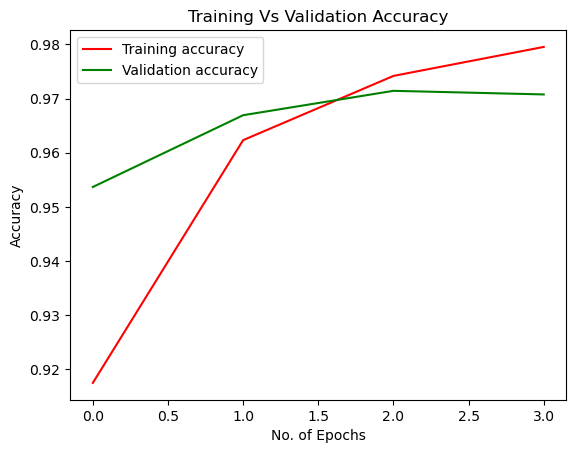

In [9]:
plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'g', label='Validation accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()